# Visualization Notebook

* Using the exported csv to run visualizations

In [ ]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/W266_Final Project/evaluated_samples_updated.csv'
combined_df = pd.read_csv(file_path)


Mounted at /content/drive


In [ ]:
combined_df.shape

(2000, 19)

In [ ]:
combined_df.columns

Index(['article_cleaned', 'highlights_cleaned', 'llama_summary', 'sts_score',
       'result', 'coverage_score', 'coherence_and_flow_score',
       'faithfulness_score', 'paraphrasing_score', 'language_and_style_score',
       'feedback_coverage', 'feedback_coherence_and_flow',
       'feedback_faithfulness', 'feedback_paraphrasing',
       'feedback_language_and_style', 'final_semantic_score', 'rouge1',
       'rouge2', 'rougeL'],
      dtype='object')

In [ ]:
combined_df["sts_score"].value_counts()

,count
sts_score,
4,1069
3,901
2,23
0,7


# Plots

3.5125


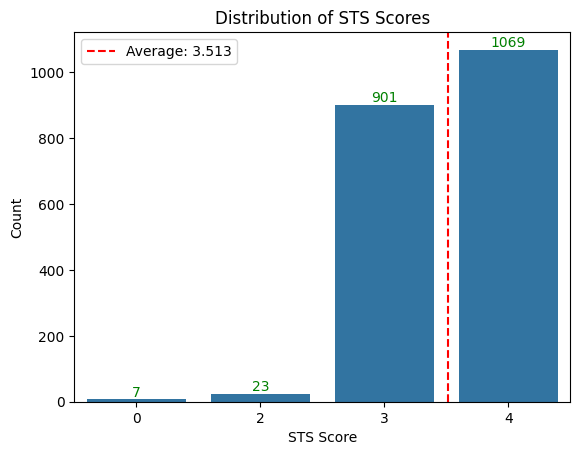

In [ ]:
# Calculate the average STS score
mean_gpt = combined_df["sts_score"].mean()
print(mean_gpt)

# Plot the distribution of STS scores
sns.countplot(x="sts_score", data=combined_df)
plt.title("Distribution of STS Scores")
plt.xlabel("STS Score")
plt.ylabel("Count")

# Add a vertical line for the average STS score
plt.axvline((mean_gpt-1), color="red", linestyle="--", label=f"Average: {mean_gpt:.3f}")

# Add counts on top of bars
for bar in plt.gca().patches:
    count = int(bar.get_height())  # Height represents the count
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate
        bar.get_height(),  # Y-coordinate
        f"{count}",  # Text to display
        ha="center",  # Horizontal alignment
        va="bottom",  # Vertical alignment
        fontsize=10,  # Font size
        color="green"  # Font color
    )
# Add a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Compute mean ROUGE scores
mean_rouge_1 = combined_df['rouge1'].mean()
mean_rouge_2 = combined_df['rouge2'].mean()
mean_rouge_l = combined_df['rougeL'].mean()

print("\nMean ROUGE Scores:")
print(f"ROUGE-1: {mean_rouge_1:.4f}")
print(f"ROUGE-2: {mean_rouge_2:.4f}")
print(f"ROUGE-L: {mean_rouge_l:.4f}")


Mean ROUGE Scores:
ROUGE-1: 0.3583
ROUGE-2: 0.1293
ROUGE-L: 0.2230


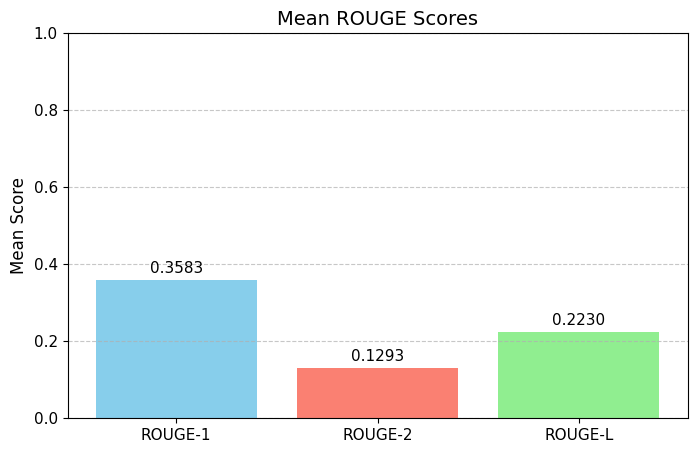

In [ ]:
# Prepare data for plotting
mean_scores = [mean_rouge_1, mean_rouge_2, mean_rouge_l]
labels = ["ROUGE-1", "ROUGE-2", "ROUGE-L"]

# Plot the bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, mean_scores, color=["skyblue", "salmon", "lightgreen"])
plt.title("Mean ROUGE Scores", fontsize=14)
plt.ylabel("Mean Score", fontsize=12)
plt.ylim(0, 1)  # ROUGE scores are typically between 0 and 1
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Annotate the bar chart with mean values
for i, score in enumerate(mean_scores):
    plt.text(i, score + 0.02, f"{score:.4f}", ha="center", fontsize=11)

plt.show()

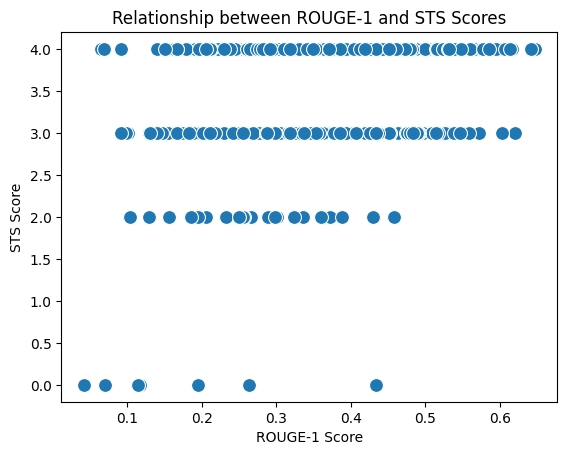

In [ ]:
# Scatter plot of Rouge-1 vs STS scores
sns.scatterplot(x="rouge1", y="sts_score", data=combined_df, marker="o", s=100)
plt.title("Relationship between ROUGE-1 and STS Scores")
plt.xlabel("ROUGE-1 Score")
plt.ylabel("STS Score")
plt.show()

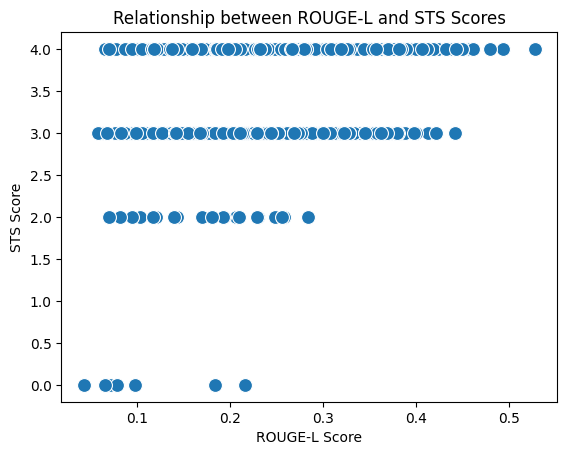

In [ ]:
# Scatter plot of Rouge-L vs STS scores
sns.scatterplot(x="rougeL", y="sts_score", data=combined_df, marker="o", s=100)
plt.title("Relationship between ROUGE-L and STS Scores")
plt.xlabel("ROUGE-L Score")
plt.ylabel("STS Score")
plt.show()

<ipython-input-11-f42a8ef6a262>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=combined_df["coverage_score"], palette="viridis")


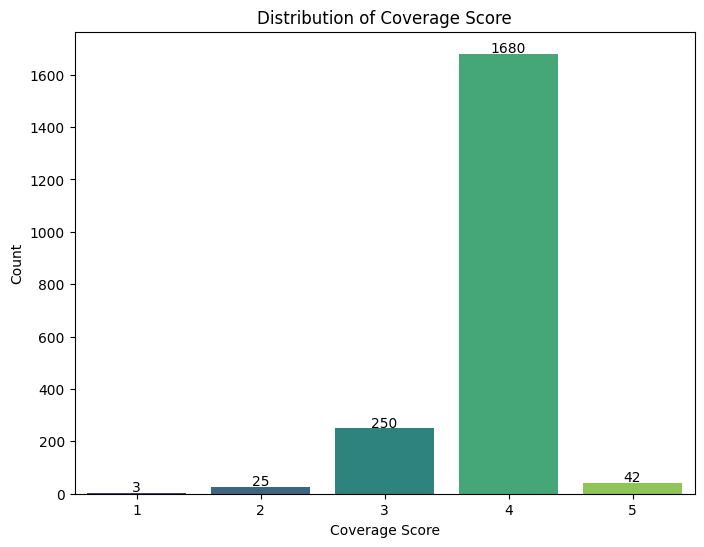

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x=combined_df["coverage_score"], palette="viridis")
plt.title("Distribution of Coverage Score")
plt.xlabel("Coverage Score")
plt.ylabel("Count")
# Add count annotations
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 5, int(p.get_height()), ha="center", fontsize=10)
plt.show()

<ipython-input-12-967c8174db87>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=combined_df["coherence_and_flow_score"], palette="viridis")


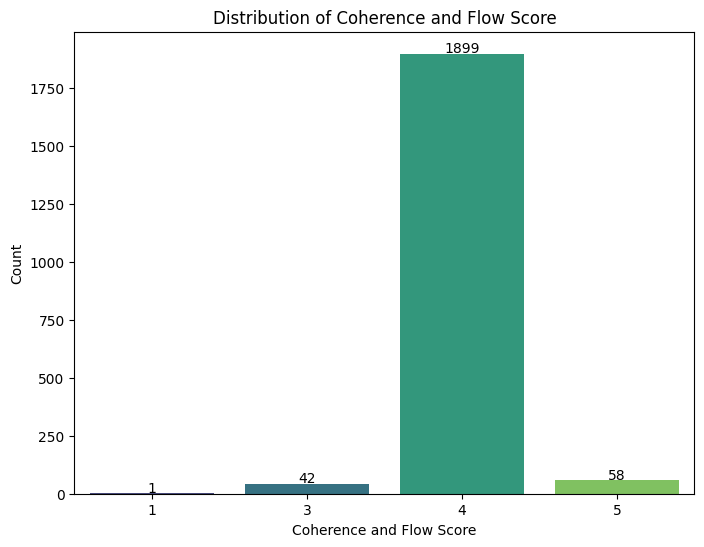

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x=combined_df["coherence_and_flow_score"], palette="viridis")
plt.title("Distribution of Coherence and Flow Score")
plt.xlabel("Coherence and Flow Score")
plt.ylabel("Count")
# Add count annotations
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 5, int(p.get_height()), ha="center", fontsize=10)
plt.show()

<ipython-input-13-07bfdf3b4ce1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=combined_df["faithfulness_score"], palette="viridis")


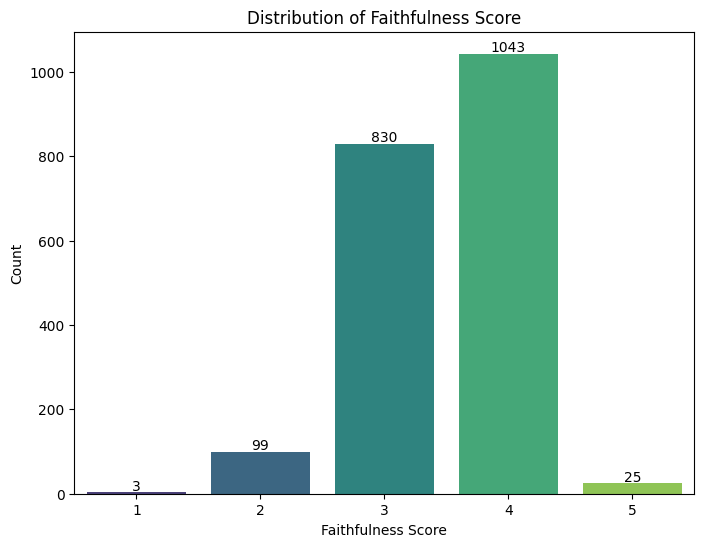

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x=combined_df["faithfulness_score"], palette="viridis")
plt.title("Distribution of Faithfulness Score")
plt.xlabel("Faithfulness Score")
plt.ylabel("Count")
# Add count annotations
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 5, int(p.get_height()), ha="center", fontsize=10)
plt.show()

<ipython-input-14-4d7e3ca796ac>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=combined_df["paraphrasing_score"], palette="viridis")


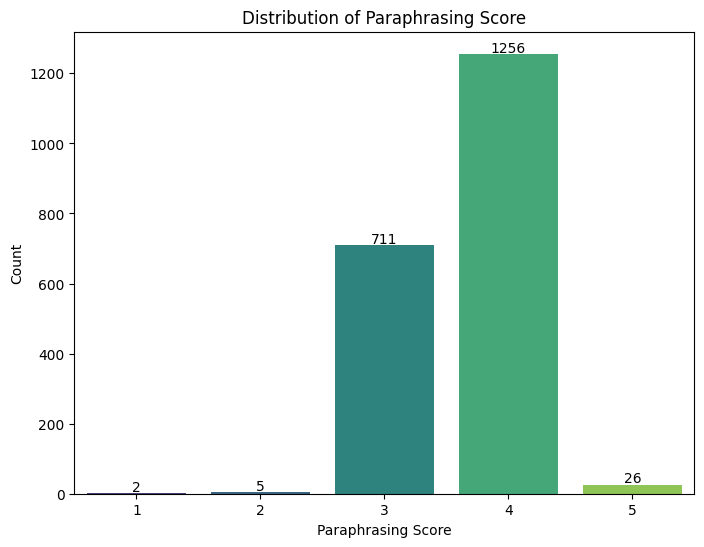

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x=combined_df["paraphrasing_score"], palette="viridis")
plt.title("Distribution of Paraphrasing Score")
plt.xlabel("Paraphrasing Score")
plt.ylabel("Count")
# Add count annotations
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 5, int(p.get_height()), ha="center", fontsize=10)
plt.show()

<ipython-input-15-53a01e6c0b23>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=combined_df["language_and_style_score"], palette="viridis")


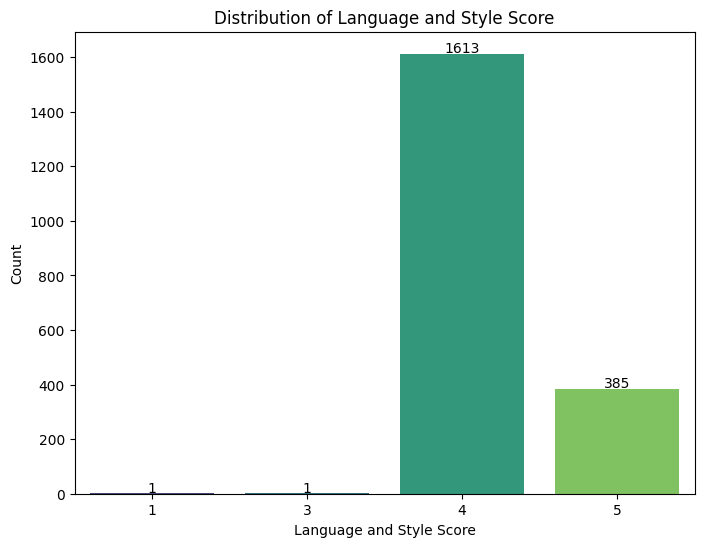

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x=combined_df["language_and_style_score"], palette="viridis")
plt.title("Distribution of Language and Style Score")
plt.xlabel("Language and Style Score")
plt.ylabel("Count")
# Add count annotations
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 5, int(p.get_height()), ha="center", fontsize=10)
plt.show()

# Computing STS Scores through sentence transformers (Not GPT scores)

In [ ]:
from sentence_transformers import SentenceTransformer, util
import pandas as pd

# Install required libraries
!pip install -q -U sentence-transformers

# Load a pre-trained STS model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Define the STS score calculation function
def calculate_sts_score(summary, reference):
    # Compute embeddings for both texts
    embeddings = model.encode([summary, reference], convert_to_tensor=True)

    # Calculate cosine similarity
    similarity_score = util.cos_sim(embeddings[0], embeddings[1])
    return similarity_score.item() # Convert to scalar

# Apply the STS score function to your DataFrame
combined_df['sts_score_notgpt'] = combined_df.apply(
    lambda row: calculate_sts_score(row['llama_summary'], row['highlights_cleaned']), axis=1
)




/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 6.2 MB/s eta 0:00:00


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Map STS scores to a Likert scale (0-5)
combined_df['sts_score_notgpt'] = (combined_df['sts_score_notgpt'] * 5).round().astype(int)

# Calculate the mean STS score
mean_notgpt= combined_df['sts_score_notgpt'].mean()
print(f"Mean STS Score: {mean_notgpt}")

combined_df.value_counts('sts_score_notgpt')



Mean STS Score: 3.712


,count
sts_score_notgpt,
4,1371
3,494
5,65
2,64
1,5
0,1


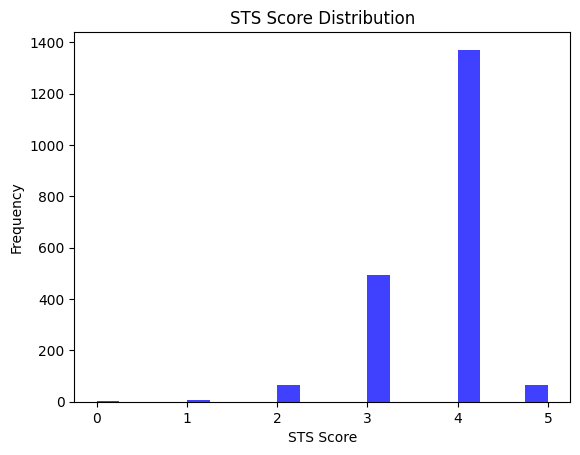

In [ ]:
# Plot the STS score distribution
plt.hist(combined_df['sts_score_notgpt'], bins=20, alpha=0.75, color='blue')
plt.title('STS Score Distribution')
plt.xlabel('STS Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
combined_df[['sts_score', 'sts_score_notgpt']].sample(15)

,sts_score,sts_score_notgpt
173,3,2
1787,3,4
1591,4,3
849,4,4
348,3,4
120,4,3
684,4,3
244,4,3
562,4,4
238,4,4


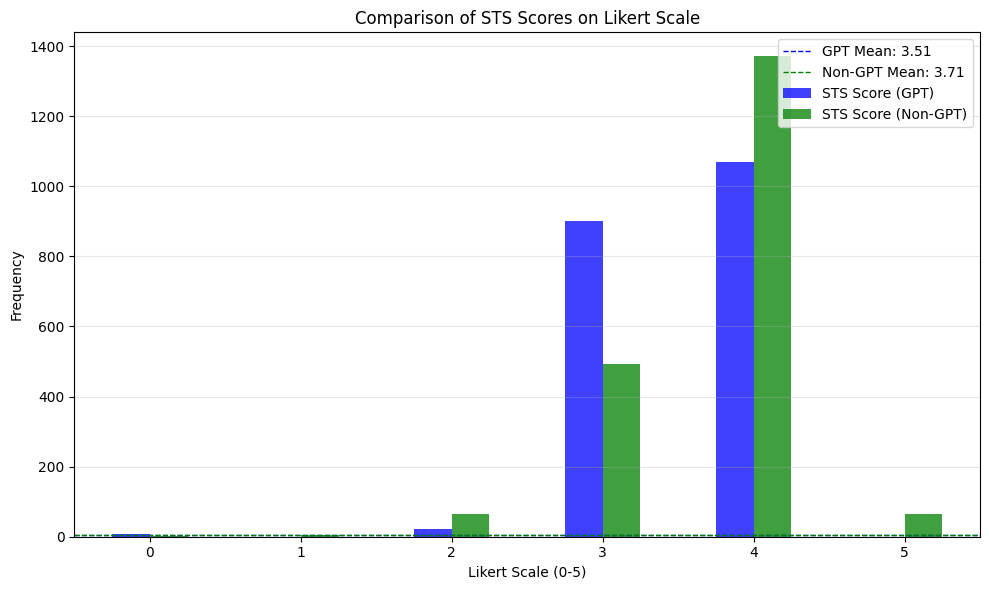

In [ ]:
# Count the frequency for each Likert score
likert_comparison = pd.DataFrame({
    "STS Score (GPT)": combined_df['sts_score'].value_counts(sort=False).sort_index(),
    "STS Score (Non-GPT)": combined_df['sts_score_notgpt'].value_counts(sort=False).sort_index()
}).sort_index()

# Create a grouped bar chart for Likert scale comparison
ax = likert_comparison.plot(kind='bar', figsize=(10, 6), color=['blue', 'green'], alpha=0.75)

# Add mean lines for GPT and Non-GPT
plt.axhline(mean_gpt, color='blue', linestyle='--', linewidth=1, label=f'GPT Mean: {mean_gpt:.2f}')
plt.axhline(mean_notgpt, color='green', linestyle='--', linewidth=1, label=f'Non-GPT Mean: {mean_notgpt:.2f}')

# Add labels, title, and legend
plt.title('Comparison of STS Scores on Likert Scale')
plt.xlabel('Likert Scale (0-5)')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()



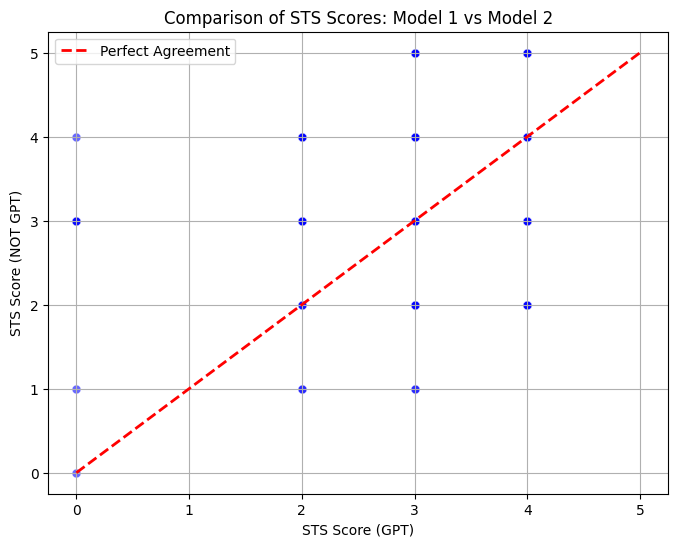

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=combined_df['sts_score'], y=combined_df['sts_score_notgpt'], alpha=0.6, color='blue', s=40)
plt.plot([0, 5], [0, 5], color='red', linestyle='--', linewidth=2, label='Perfect Agreement')
plt.title('Comparison of STS Scores: Model 1 vs Model 2')
plt.xlabel('STS Score (GPT)')
plt.ylabel('STS Score (NOT GPT)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr


# Mean Absolute Difference
mad = np.mean(np.abs(combined_df['sts_score'] - combined_df['sts_score_notgpt']))
print(f"Mean Absolute Difference (MAD): {mad}")

# Mean Difference
mean_diff = np.mean(combined_df['sts_score'] - combined_df['sts_score_notgpt'])
print(f"Mean Difference: {mean_diff}")

# Root Mean Squared Difference
rmsd = np.sqrt(np.mean((combined_df['sts_score'] - combined_df['sts_score_notgpt']) ** 2))
print(f"Root Mean Squared Difference (RMSD): {rmsd}")

# Pearson Correlation
pearson_corr, _ = pearsonr(combined_df['sts_score'], combined_df['sts_score_notgpt'])
print(f"Pearson Correlation: {pearson_corr}")

# Spearman Correlation
spearman_corr, _ = spearmanr(combined_df['sts_score'], combined_df['sts_score_notgpt'])
print(f"Spearman Correlation: {spearman_corr}")


Mean Absolute Difference (MAD): 0.5205
Mean Difference: -0.1995
Root Mean Squared Difference (RMSD): 0.7619055059520177
Pearson Correlation: 0.19321309249242394
Spearman Correlation: 0.14115834839229546


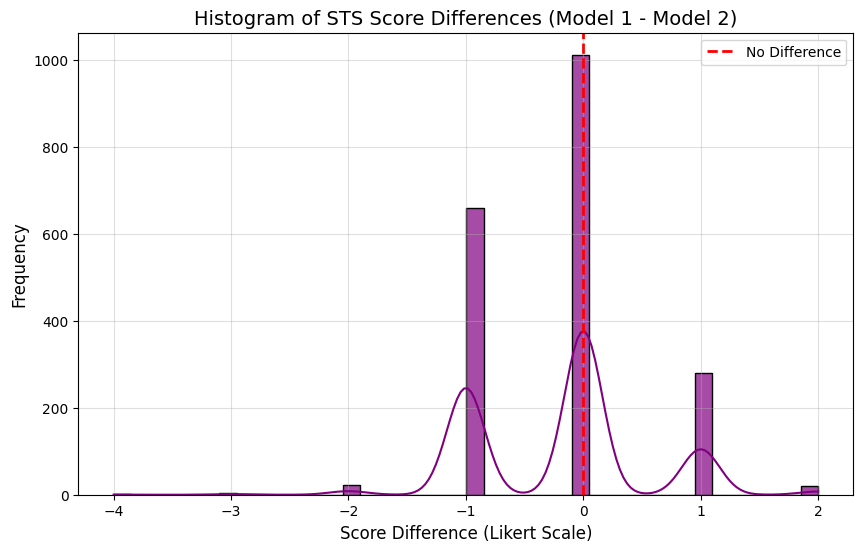

In [ ]:
# Calculate the differences between the two STS scores
combined_df['score_difference'] = combined_df['sts_score'] - combined_df['sts_score_notgpt']

# Plot the histogram of differences
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['score_difference'], bins=40, kde=True, color='purple', alpha=0.7)
plt.axvline(0, color='red', linestyle='--', linewidth=2, label='No Difference')
plt.title('Histogram of STS Score Differences (Model 1 - Model 2)', fontsize=14)
plt.xlabel('Score Difference (Likert Scale)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.4)
plt.show()

Extended Distribution Table:
                              mean       std    median       min       max
coverage_score            3.866500  0.437920  4.000000  1.000000  5.000000
coherence_and_flow_score  4.006500  0.233420  4.000000  1.000000  5.000000
faithfulness_score        3.494000  0.618996  4.000000  1.000000  5.000000
paraphrasing_score        3.649500  0.514570  4.000000  1.000000  5.000000
language_and_style_score  4.190500  0.401610  4.000000  1.000000  5.000000
rouge1                    0.358263  0.096525  0.358295  0.042254  0.646341
rouge2                    0.129333  0.070889  0.119612  0.000000  0.405594
rougeL                    0.223038  0.068870  0.215569  0.042254  0.527473
sts_score                 3.512500  0.561250  4.000000  0.000000  4.000000
sts_score_notgpt          3.712000  0.596015  4.000000  0.000000  5.000000


<ipython-input-24-5e2b828ef162>:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,2].set_xticklabels(core_metrics, rotation=45, ha='right')


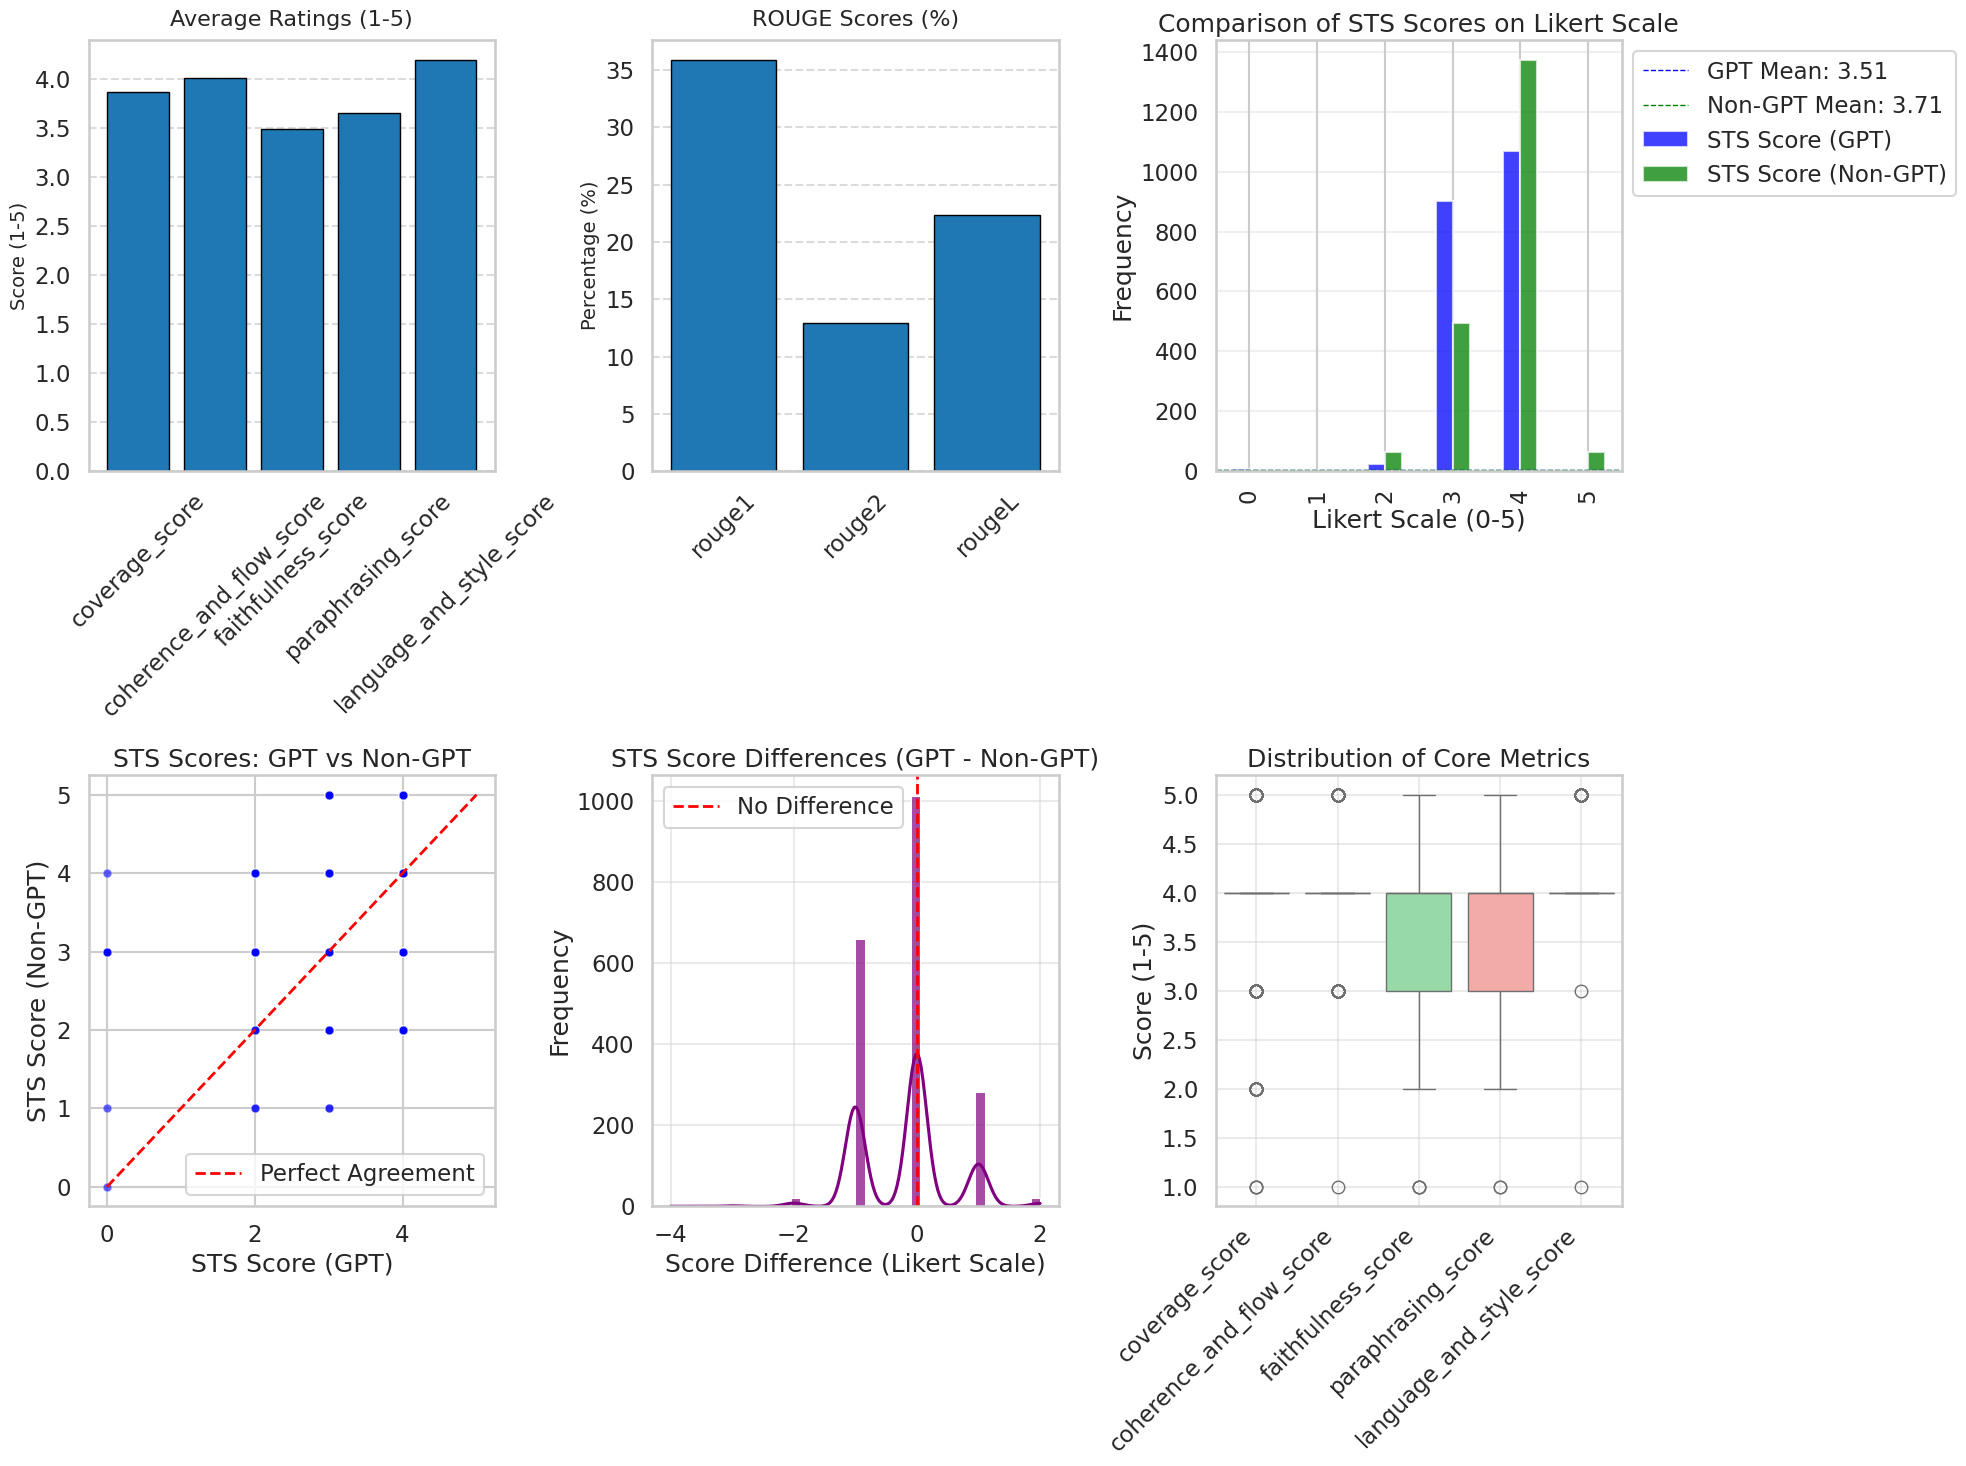

In [ ]:
# Core and Rouge metrics as before
core_metrics = ["coverage_score", "coherence_and_flow_score", "faithfulness_score",
                "paraphrasing_score", "language_and_style_score"]
rouge_metrics = ["rouge1", "rouge2", "rougeL"]
other_metrics = ["sts_score", "sts_score_notgpt"]

# Calculate extended statistics for the summary table
stats = combined_df[core_metrics + rouge_metrics + other_metrics].agg(['mean', 'std', 'median', 'min', 'max']).T
print("Extended Distribution Table:")
print(stats)

# ROUGE % for plotting
rouge_percent = combined_df[rouge_metrics].mean() * 100

# Grouped bar chart for Likert scale comparison (STS GPT vs Non-GPT)
likert_comparison = pd.DataFrame({
    "STS Score (GPT)": combined_df['sts_score'].value_counts(sort=False).sort_index(),
    "STS Score (Non-GPT)": combined_df['sts_score_notgpt'].value_counts(sort=False).sort_index()
}).sort_index()

mean_gpt = combined_df['sts_score'].mean()
mean_notgpt = combined_df['sts_score_notgpt'].mean()

# Calculate differences for histogram
combined_df['score_difference'] = combined_df['sts_score'] - combined_df['sts_score_notgpt']

# Combine plots
sns.set_theme(style="whitegrid", context="talk")
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
####################################
# (0,0) Average Ratings (1-5)
####################################
axes[0,0].bar(core_metrics, combined_df[core_metrics].mean(), color='#1f77b4', edgecolor='black', linewidth=1)
axes[0,0].set_title("Average Ratings (1-5)", fontsize=16, pad=10)
axes[0,0].set_ylabel("Score (1-5)", fontsize=14)
axes[0,0].tick_params(axis='x', labelrotation=45)
axes[0,0].yaxis.grid(True, linestyle='--', alpha=0.7)
axes[0,0].xaxis.grid(False)  # Keep vertical grid lines off for cleaner look

####################################
# (0,1) ROUGE Scores (%)
####################################
axes[0,1].bar(rouge_percent.index, rouge_percent.values, color='#1f77b4', edgecolor='black', linewidth=1)
axes[0,1].set_title("ROUGE Scores (%)", fontsize=16, pad=10)
axes[0,1].set_ylabel("Percentage (%)", fontsize=14)
axes[0,1].tick_params(axis='x', labelrotation=45)
axes[0,1].yaxis.grid(True, linestyle='--', alpha=0.7)
axes[0,1].xaxis.grid(False)

####################################
# (0,2) Grouped Bar Chart for STS GPT vs Non-GPT
####################################
likert_comparison.plot(kind='bar', ax=axes[0,2], color=['blue', 'green'], alpha=0.75)
axes[0,2].axhline(mean_gpt, color='blue', linestyle='--', linewidth=1, label=f'GPT Mean: {mean_gpt:.2f}')
axes[0,2].axhline(mean_notgpt, color='green', linestyle='--', linewidth=1, label=f'Non-GPT Mean: {mean_notgpt:.2f}')
axes[0,2].set_title('Comparison of STS Scores on Likert Scale')
axes[0,2].set_xlabel('Likert Scale (0-5)')
axes[0,2].set_ylabel('Frequency')
legend = axes[0,2].legend(loc='upper left', bbox_to_anchor=(1, 1))
axes[0,2].grid(axis='y', alpha=0.3)

####################################
# (1,0) Scatterplot: STS (GPT) vs STS (Non-GPT)
####################################
sns.scatterplot(x=combined_df['sts_score'], y=combined_df['sts_score_notgpt'], alpha=0.6, color='blue', s=40, ax=axes[1,0])
axes[1,0].plot([0,5],[0,5], color='red', linestyle='--', linewidth=2, label='Perfect Agreement')
axes[1,0].set_title('STS Scores: GPT vs Non-GPT')
axes[1,0].set_xlabel('STS Score (GPT)')
axes[1,0].set_ylabel('STS Score (Non-GPT)')
axes[1,0].legend()
axes[1,0].grid(True)

####################################
# (1,1) Histogram of Differences
####################################
sns.histplot(combined_df['score_difference'], bins=40, kde=True, color='purple', alpha=0.7, ax=axes[1,1])
axes[1,1].axvline(0, color='red', linestyle='--', linewidth=2, label='No Difference')
axes[1,1].set_title('STS Score Differences (GPT - Non-GPT)')
axes[1,1].set_xlabel('Score Difference (Likert Scale)')
axes[1,1].set_ylabel('Frequency')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.4)

####################################
# (1,2) Distribution of Core Metrics (Boxplot)
####################################
sns.boxplot(data=combined_df[core_metrics], ax=axes[1,2], palette='pastel')
axes[1,2].set_title("Distribution of Core Metrics")
axes[1,2].set_ylabel("Score (1-5)")
axes[1,2].set_xticklabels(core_metrics, rotation=45, ha='right')
axes[1,2].grid(True, alpha=0.4)

plt.tight_layout()
plt.show()

In [ ]:
combined_df["coverage_score"].describe()

,coverage_score
count,2000.00000
mean,3.86650
std,0.43792
min,1.00000
25%,4.00000
50%,4.00000
75%,4.00000
max,5.00000


In [ ]:
combined_df.head(1)

,article_cleaned,highlights_cleaned,llama_summary,sts_score,result,coverage_score,coherence_and_flow_score,faithfulness_score,paraphrasing_score,language_and_style_score,...,feedback_coherence_and_flow,feedback_faithfulness,feedback_paraphrasing,feedback_language_and_style,final_semantic_score,rouge1,rouge2,rougeL,sts_score_notgpt,score_difference
0,By . Daily Mail Reporter . PUBLISHED: . 20:34 ...,"Andrew McGaughey, 65, buried to his neck when ...","A 65-year-old British man, Andrew McGaughey, d...",4,"{'scores': {'coverage': 4, 'coherence_and_flow...",4,4,4,4,5,...,The summary flows well and presents informatio...,The summary accurately reflects the events but...,"The paraphrasing is effective, maintaining the...","The language is clear and professional, with n...",84,0.339286,0.145455,0.214286,4,0
